In [2]:
#This is a hack to make the %%cpp work inside mybinder.org - ignore
from ROOT import TObject

Welcome to JupyROOT 6.28/04


In [ ]:
%%cpp
//Open the file tree2.root
TFile file("../Lecture1/tree2.root");
//Print the contents of the global directory
gDirectory->Print();

In [ ]:
%%cpp
//Print even more details from the global directory
gDirectory->ls();

In [ ]:
#The same thing in python.
from ROOT import TFile,gDirectory
filePython = TFile("../Lecture1/tree2.root")
gDirectory.Print()
gDirectory.ls()

In [ ]:
#Task1 call the Print() methods on some of the other gObject pointers (gEnv, gRandom etc) to see what you see.
#Hint: Read section 2.6 of: https://root.cern.ch/root/html534/guides/users-guide//ROOTUsersGuideLetter.pdf

In [ ]:
#Task2: Use the TTree, t2, to draw a histogram again of destep with whatever name you wish.
#Then check whether it shows up in your global directory.

In [ ]:
%%cpp
//Create an integer variable
int mark = 1;
//Create a pointer to an integer variable
int* mark2 = new int(2);
mark

In [ ]:
%%cpp
mark2

In [ ]:
%%cpp
//Delete the integer held in memory which is pointed at by the pointer mark2
delete mark2;

In [ ]:
%%cpp
//Create a unique_ptr object, which holds a pointer to a variable of type integer.
std::unique_ptr<int> mark3(new int(3));
mark3

In [ ]:
%%cpp
//The "*" symbol ("operator") tells the computer to "dereference" the pointer - in practice this means you get the
//the value of the variable the pointer points at, rather than the memory address. Both unique_ptr and normal
//pointers have a * operator that behaves in this same way.
*mark3

In [ ]:
%%cpp
//Notice we cannnot use the delete statement in the case of a unique_ptr.
//When the unique_ptr ceases to exist in memory it knows to delete any memory it allocated, so delete is not needed!
delete mark3;

In [ ]:
%%cpp
//Use the auto keyword to let the compiler or CLING figure out that make_unique returns a unique_ptr.
auto mark4 = std::make_unique<int>(3);
mark4

In [ ]:
%%cpp
//Create a pointer to an object of type TH1F
TH1F* f = new TH1F("m","m",100,0,10);
//Close the global directory - this triggers all data it owns to be deleted...
gDirectory->Close();
//....and so if we attempt to delete the memory pointed at by f we get a crash, because the memory has already
//been deleted. gDirectory owns the memory pointed at by f. Need to be careful!
delete f;

In [ ]:
%%cpp
//Lets try the same thing, using unique_ptr
auto f = std::make_unique<TH1F>("m2","m2",100,0,10);
//Check what f is
*f

In [ ]:
%%cpp
//Close the global directory
gDirectory->Close();
//Now cannot dereference f - gDirectory cleaned up the memory owned by the unique_ptr
//This is a design flaw in ROOT - should not be taking ownership of memroy already owned by unique_ptr.
//Eventually would behave properly in ROOT 7 (not released yet)
*f

In [3]:
%%cpp
//Note you should "restart and clear output" from the kernel menu before executing this code - above crashes
//mess up the system...
//Don't forget to re-execute box 1 (import of ROOT), which is needed for the %%cpp command above.
//Create a TH1F without using pointers or allocating memory explicitly
TH1F marksHist("m3","m3",100,0,10);
//See if it is in the global directory
gDirectory->ls()

 OBJ: TH1F	m3	m3 : 0 at: 0x11bd2c018


In [4]:
%%cpp
//Close the global directory - which means all memory it owns is cleaned up and objects/variables there deleted.
gDirectory->Close();
//The global directory does not own marksHist, and so it still exists - avoid using pointers to avoid the above
//issues with pointer memory ownership. Of course python also does not have the issue at all.
marksHist

(TH1F &) Name: m3 Title: m3 NbinsX: 100


In [5]:
%%cpp
TSystemDirectory dir("dir",gSystem->pwd())

(TSystemDirectory &) Name: dir Title: /Users/markhodgkinson/ROOTSheffieldTeachingMaterial2020/Lecture2


In [6]:
%%cpp
//Get the list of files - TList is an array of TSystemFile*
auto fileList = static_cast<TList*>(dir.GetListOfFiles());
//Create a pointer which points at nothing
TSystemFile *f = nullptr;
//Set up a string to make use of - TString is the ROOT analogy of c++ std::string
TString fName;
//Create an iterator over the fileList
TIter nextFile(fileList);
//iterator over the fileList and print the file names
while ((f = static_cast<TSystemFile*>(nextFile()))){ fName= f->GetName(); std::cout << fName << std::endl;}

.
..
merged.root
Lecture2.ipynb
f2.root
hist1.root
hist2.root
f1.root
.ipynb_checkpoints


In [7]:
#The same thing in python
#Import all the c++ classes we need
from ROOT import TSystemDirectory,gSystem,TSystemFile,TString,TIter
#Then set up the same things as was done in the above c++ example
dir = TSystemDirectory("dir",gSystem.pwd())
fileList = dir.GetListOfFiles()
f=TSystemFile()
fName=TString()
nextFile = TIter(fileList)
#Set a counter for our loop
counter = 0
#print the filename in each iteration and keep going until counter is the length of the list.
while counter < len(fileList):
    f = nextFile()
    print(f.GetName())
    counter += 1

.
..
merged.root
Lecture2.ipynb
f2.root
hist1.root
hist2.root
f1.root
.ipynb_checkpoints


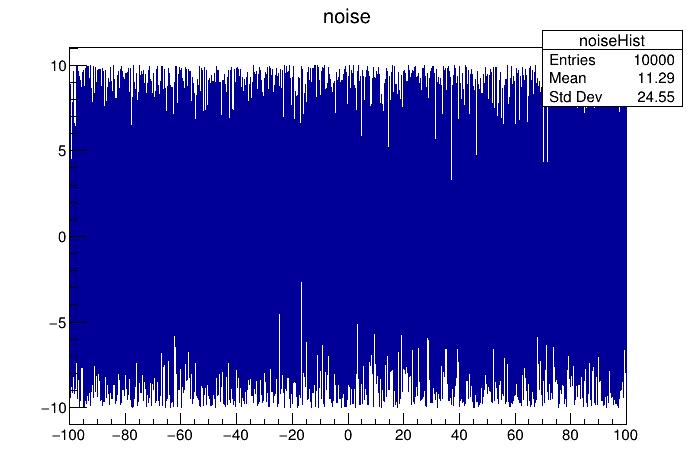

In [8]:
%%cpp
//hadding example, with c++
//Create a histogram
TH1F h1("noiseHist","noise",10000,-100,100);
//Fill it using randomly generated numbers
for (unsigned int i = 0; i < h1.GetNbinsX(); ++i) h1.SetBinContent(i,-10 + gRandom->Rndm()*20);
//Open a new file and a get a pointer, f1, to the TFile. RECREATE ensures any existing file is overwritten.
auto f1 = TFile::Open("hist1.root","RECREATE");
//Create a canvas and draw the histogram on it.
TCanvas canNoise;
canNoise.cd();
h1.Draw();
canNoise.Draw()

In [9]:
%%cpp
//Write the histogtam into the file represented by f1. 
h1.Write();
f1->ls()

TFile**		hist1.root	
 TFile*		hist1.root	
  KEY: TH1F	noiseHist;1	noise


In [10]:
%%cpp
//Close the file.
f1->Close();

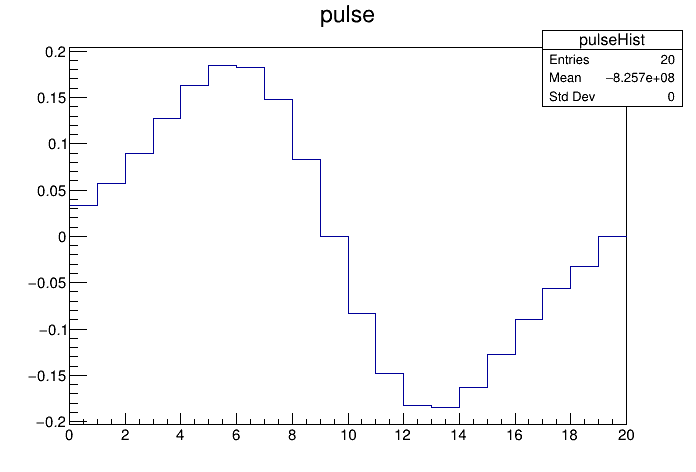

In [11]:
%%cpp
//Create another file
auto f2 = TFile::Open("hist2.root","RECREATE");
//Setup some parameters we will use
float pulseWidth = 20;
float amp = 200;
//Note that the random means we will get different values if we-execute this code.
float width = gRandom->Rndm()*0.5*pulseWidth;
float sigma = gRandom->Rndm()*0.5*width;
//Create a forumula represented by the TF1 class.
//Take a look at https://root.cern.ch/doc/master/classTF1.html
//The numbers [0] and [1] represent the two parameters we want to use in our forumula.
//The valid range of x is -width to + width, specified by the last tow arguments.
TF1 myFormula("myFormula","[0]*exp(-0.5*(x/[1])*(x/[1]))",-width,width);
//Create a histogram which we will fill up.
TH1F h2("pulseHist","pulse",pulseWidth,0,pulseWidth);
//Set the two parameters [0] and [1] to correspond to amp and sigma.
myFormula.SetParameters(0,amp);
myFormula.SetParameters(1,sigma);
//Fill our histogram and draw it
for (unsigned int i = 0; i < pulseWidth; ++i) h2.SetBinContent(i,myFormula.Derivative(-width + i*2*width/pulseWidth));
canNoise.Clear();
h2.Draw();
canNoise.Draw()                                          

In [12]:
%%cpp
h2.Write();
f2->Close();

In [13]:
#Task3.
#Write a python version of the code which creates the two above histograms and writes them to the files.

In [14]:
#The ! tells python to execute the command in the underlying linux system (i.e. terminal command line)
#We use hadd to merge our two files.
#Note this only works if merged.root does not exist yet (if it does the error message will tell 
#you how to adjust the file...)
!hadd merged.root hist1.root hist2.root

hadd Target file: merged.root
hadd compression setting for all output: 1
Error in <TFile::TFile>: file /Users/markhodgkinson/ROOTSheffieldTeachingMaterial2020/Lecture2/merged.root already exists
Error in <TFileMerger::OutputFile>: cannot open the MERGER output file 
hadd error opening target file (does merged.root exist?).
Pass "-f" argument to force re-creation of output file.


In [ ]:
#Task 4. Open the merged.root and see what the merged file contains

In [ ]:
#Initialise a couple of float variables
#Note we have to create arrays of size 1, which act as pointers for the TTree to use
from array import array
x = array('f',[0])
y = array('f',[0])
#Create a TTree object and specify two branches to represent our float variables x and y
from ROOT import TTree
myTree1 = TTree("xy","tree1")
myTree1.Branch("x",x,"x/F")
myTree1.Branch("y",y,"y/F")
from ROOT import gRandom
for i in range(0,1000):
    #In each loop we sample from a Gaussian randomly. The arguments correspond to the mean and
    #width of the Gaussian distribution to use.
    x[0] = gRandom.Gaus(10,1)
    y[0] = gRandom.Gaus(20,2)
    #We also fill the tree on each iteration
    myTree1.Fill()   
#We open a file and write the tree to disk
from ROOT import TFile
myFile1 = TFile.Open("f1.root","RECREATE")
myTree1.Write()
myFile1.Close()

#Now repeat for a second tree
x2 = array('f',[0])
y2 = array('f',[0])
#Note the name (first argument) must be identical to the previous tree, if we 
#want to use it with a TChain
myTree2 = TTree("xy","tree2")
myTree2.Branch("x",x2,"x/F")
myTree2.Branch("y",y2,"y/F")
for i in range(0,1000):
    x2[0] = gRandom.Gaus(30,3);
    y2[0] = gRandom.Gaus(40,4);
    myTree2.Fill()
    
myFile2 = TFile.Open("f2.root","RECREATE")
myTree2.Write()
myFile2.Close()

#Create a TChain object
from ROOT import TChain
#Note the name of the TTree to find in each file is xy, and that is why both
#of our TTrees had to have the same name.
myChain = TChain("xy")
#Add both of our files to the chain
myChain.Add("f1.root")
myChain.Add("f2.root")
#Then we can draw variables in the same way as we could for a TTree
#But now we get the values of e.g. x in both trees in one go!
from ROOT import TCanvas
canChain = TCanvas()
canChain.cd()
myChain.Draw("x:y","","box")
canChain.Draw()



In [ ]:
#Task 5. Open hist2.root, get the histogram and do a fit to it of an appropriate shape. Try both predefined
#functions and your own user defined fit function (TF1)
#If you have access to ROOT installed on a computer, do the same using a TBrowser.
#Then right click the histogram and select FitPanel

In [ ]:
#You can also make user defined functions depend on other user defined functions
from ROOT import TF1
sinc = TF1("sinc","sin(x)/x",-20,20)
canFit = TCanvas()
canFit.cd()
sinc.Draw()
canFit.Draw()

In [ ]:
secondFunction = TF1("secondFunction","sinc*x*x",-20,20)
canFit.Clear()
secondFunction.Draw()
canFit.Draw()